In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import random


In [2]:
import sklearn
sklearn.__version__

'1.0.2'

In [3]:
wine=load_wine()


In [4]:
data = pd.DataFrame(data= np.c_[wine['data']],
                     columns= wine['feature_names'])
data.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
164,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
155,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0
60,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [6]:
data.shape

(178, 13)

In [7]:
data.size

2314

In [8]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [10]:
scaler=StandardScaler()
scaled_data = scaler.fit_transform(data)

In [11]:
type(scaled_data)

numpy.ndarray

In [12]:
df = pd.DataFrame(scaled_data,columns=data.columns)

In [13]:
df.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
139,-0.198406,0.559829,0.890014,1.352801,0.088358,0.039878,-1.434939,1.354888,-1.368201,-0.059734,-0.295924,-0.652104,-0.499626
32,0.839217,-0.454530,-0.023821,-0.689137,0.298998,0.200111,0.663351,0.468530,0.664217,-0.526909,1.195772,0.364855,0.774172
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
47,1.110975,-0.589180,-0.901103,-1.049479,0.088358,1.289697,1.366128,-1.223610,0.962071,0.450699,-0.208177,1.014578,0.758249


C:\Users\Dell\anacondanew\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


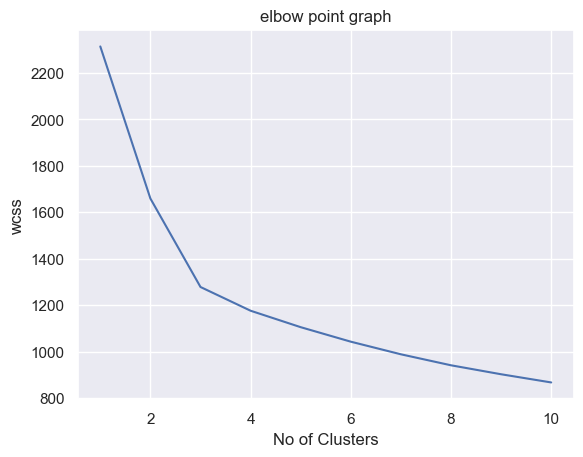

In [14]:
wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(scaled_data)

  wcss.append(kmeans.inertia_)
sns.set()
plt.plot(range(1,11), wcss)
plt.title('elbow point graph')
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

# For random number

In [15]:
import random
a=[]
for i in range(1,100):
    a.append(random.random())

In [16]:
b=np.array(a)

In [17]:
b.shape

(99,)

In [18]:
c=b.reshape(-1, 1)

In [19]:
type(c)

numpy.ndarray

In [20]:
c.shape

(99, 1)

C:\Users\Dell\anacondanew\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


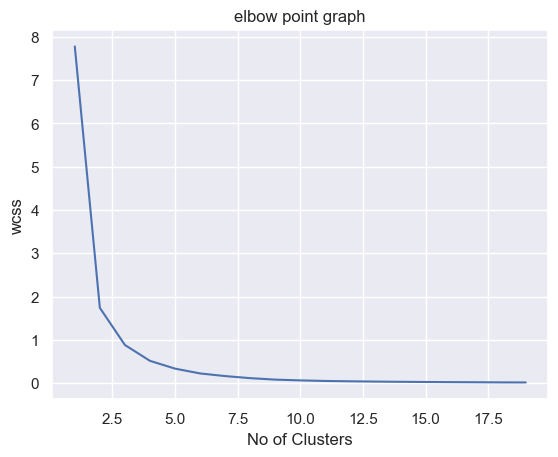

In [21]:
css=[]

for i in range(1,20):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(c)

  css.append(kmeans.inertia_)
sns.set()
plt.plot(range(1,20), css)
plt.title('elbow point graph')
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

# Silhouette score method(alternative of elbow)

In [25]:
from sklearn.metrics import silhouette_score
# Define a range of cluster numbers to evaluate
cluster_range = range(2, 11)  # You can adjust the range as needed

# Initialize an empty list to store silhouette scores
silhouette_scores = []

for n_clusters in cluster_range:
    # Fit the K-means model to the data
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(data)
    
    # Calculate the silhouette score for this clustering
    silhouette_avg = silhouette_score(data, cluster_labels)
    
    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Find the number of clusters with the highest silhouette score
optimal_num_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]

print(f"The optimal number of clusters is {optimal_num_clusters}")


The optimal number of clusters is 2


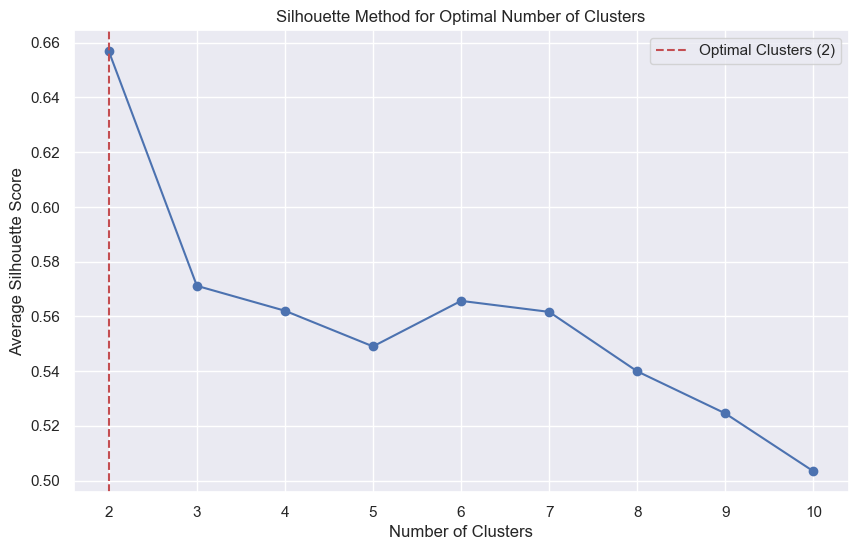

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already calculated the silhouette scores as 'silhouette_scores'
# and determined the range of cluster numbers as 'cluster_range'

# Create a line plot to visualize Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Method for Optimal Number of Clusters')

# Highlight the optimal number of clusters
optimal_score = max(silhouette_scores)
optimal_num_clusters = cluster_range[silhouette_scores.index(optimal_score)]
plt.axvline(x=optimal_num_clusters, color='r', linestyle='--', label=f'Optimal Clusters ({optimal_num_clusters})')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [28]:
sns.(data)

AttributeError: module 'seaborn' has no attribute 'Cluster'